# Import

In [1]:
import os
import numpy as np
import pandas as pd
import spacy

import matplotlib.pyplot as plt
import seaborn as sns

sns.set
%matplotlib inline

# Load the dataset

Head
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
_____________________________________________________________________________
Shape
(4000, 2)
_____________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
review       4000 non-null object
sentiment    4000 non-null object
dtypes: object(2)
memory usage: 62.6+ KB
None


,review,sentiment
count,4000,4000
unique,3998,2
top,My favourite police series of all time turns t...,negative
freq,2,2027


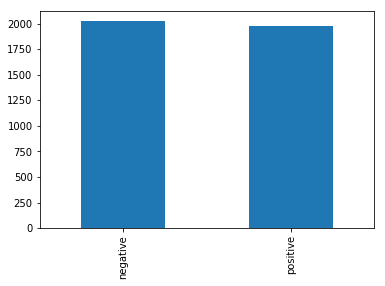

In [2]:
imdb_data=pd.read_csv('IMDBDataset.csv')

df_train=imdb_data[:4000]

print("Head")
print(df_train.head())
print("_____________________________________________________________________________")
print("Shape")
print(df_train.shape)
print("_____________________________________________________________________________")
print(df_train.info())

df_train['sentiment'].value_counts().plot(kind='bar');
df_train.describe()

The data is clean, there is no Naan values

# Preprocessing

## Tokenizing

Creation of a tokenize's function permitting to automatically tokenize our train and test set

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def tokenize(data):
    corpus = [word_tokenize(token) for token in data]
    lowercase_train = [[token.lower() for token in doc] for doc in corpus]
    alphas = [[token for token in doc if token.isalpha()] for doc in lowercase_train]
    stop_words = stopwords.words('english')
    train_no_stop = [[token for token in doc if token not in stop_words] for doc in alphas]
    stemmer = PorterStemmer()
    stemmed = [[stemmer.stem(token) for token in doc] for doc in train_no_stop]
    train_clean_str = [ ' '.join(doc) for doc in stemmed]
    return train_clean_str

In [4]:
X_train=imdb_data.review[:4000]
y_train=imdb_data.sentiment[:4000]

X_train = tokenize(X_train)

X_test2=imdb_data.review[40000:45000]
y_test2=imdb_data.sentiment[40000:45000]

X_test2 = tokenize(X_test2)
y_test2 = y_test2.values.tolist()

X_train[1]

'wonder littl product br br film techniqu fashion give comfort sometim discomfort sens realism entir piec br br actor extrem well michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life br br realism realli come home littl thing fantasi guard rather use tradit techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

# Machine Learning

## Preprocessing

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(stop_words='english')

## Machine learning models

### MultinomialNB

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
pipe = Pipeline([('vectorizer', cvec), ('mnb', mnb)])

y_train=y_train.values.tolist()
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


cm = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_pred, y_train)

print(cm)
print("Accuracy :" , accuracy)

cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()

cr = classification_report(y_train, y_pred)
print(cr, cv)

[[1988   39]
 [ 176 1797]]
Accuracy : 0.94625
              precision    recall  f1-score   support

    negative       0.92      0.98      0.95      2027
    positive       0.98      0.91      0.94      1973

   micro avg       0.95      0.95      0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000
 0.8230473548741039


# Semi Supervised 

In [8]:
iterasi=1
acc_train=[]
acc_test=[]
acc_test2=[]

seed=1.10
data_total=len(X_train)
data_iter=int(seed*data_total)


In [9]:

print(data_total)
print(data_iter)


y_pred_fromtrain=pipe.predict(X_train)
cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
cr = classification_report(y_pred_fromtrain, y_train)
cm = confusion_matrix(y_train, y_pred_fromtrain)
accuracy = accuracy_score(y_pred_fromtrain, y_train)
acc_train.append(accuracy)
print("\nTrain Data=",len(X_train),len(y_train))
print("Predicton from train data model ke-",iterasi)
print("\nCross validation score:",cv,"\n",cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")


X_test=imdb_data.review[data_total:data_iter]
y_test=imdb_data.sentiment[data_total:data_iter]

pipe.fit(X_train,y_train)

print("Train Data=",len(X_train),len(y_train))
print("Test Data=",len(X_test),len(y_test))

y_test=y_test.values.tolist()
X_test=tokenize(X_test)
y_pred=pipe.predict(X_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_pred, y_test)
acc_test.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")

y_pred_fromtest2=pipe.predict(X_test2)
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
acc_test2.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")





iterasi=iterasi+1


for i in range (0,len(X_test)) :
        X=X_test[i]
        y=y_pred[i]
        X_train.append(X)
        y_train.append(y)
        
print(len(X_train),len(y_train))

data_total=data_iter
data_iter=int(seed*data_total)

4000
4400

Train Data= 4000 4000
Predicton from train data model ke- 1

Cross validation score: 0.8230473548741039 
               precision    recall  f1-score   support

    negative       0.98      0.92      0.95      2164
    positive       0.91      0.98      0.94      1836

   micro avg       0.95      0.95      0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000


Confusion Matrix : 
 [[1988   39]
 [ 176 1797]]
Accuracy : 0.94625
__________________________________________________________________________________________________
Train Data= 4000 4000
Test Data= 400 400
prediction from test data, model ke- 1
              precision    recall  f1-score   support

    negative       0.81      0.88      0.84       194
    positive       0.87      0.81      0.84       206

   micro avg       0.84      0.84      0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84    

In [10]:
while data_total < 10000 :

    print(data_total,data_iter,len(X_train))


    y_pred_fromtrain=pipe.predict(X_train)
    cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
    cr = classification_report(y_pred_fromtrain, y_train)
    cm = confusion_matrix(y_train, y_pred_fromtrain)
    accuracy = accuracy_score(y_pred_fromtrain, y_train)
    acc_train.append(accuracy)
    print("\nTrain Data=",len(X_train),len(y_train))
    print("Predicton from train data model ke-",iterasi)
    print("\nCross validation score:",cv,"\n",cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")


    X_test=imdb_data.review[data_total:data_iter]
    y_test=imdb_data.sentiment[data_total:data_iter]

    pipe.fit(X_train,y_train)

    print("Train Data=",len(X_train),len(y_train))
    print("Test Data=",len(X_test),len(y_test))

    y_test=y_test.values.tolist()
    X_test=tokenize(X_test)
    y_pred=pipe.predict(X_test)

    cr = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_pred, y_test)
    acc_test.append(accuracy)
    print("prediction from test data, model ke-",iterasi)
    print(cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")
    
    y_pred_fromtest2=pipe.predict(X_test2)
    cr = classification_report(y_test2, y_pred_fromtest2)
    cm = confusion_matrix(y_test2, y_pred_fromtest2)
    accuracy = accuracy_score(y_pred_fromtest2, y_test2)
    acc_test2.append(accuracy)
    print("prediction from test data, model ke-",iterasi)
    print(cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")





    iterasi=iterasi+1
    
    for i in range (0,len(X_test)) :
         if (data_total+i) < 10000:
            X=X_test[i]
            y=y_pred[i]
            X_train.append(X)
            y_train.append(y)
            
    print(len(X_train),len(y_train))
    
    data_total=data_iter
    data_iter=int(seed*data_total)

4400 4840 4400

Train Data= 4400 4400
Predicton from train data model ke- 2

Cross validation score: 0.8319387913720254 
               precision    recall  f1-score   support

    negative       0.98      0.93      0.95      2374
    positive       0.92      0.98      0.95      2026

   micro avg       0.95      0.95      0.95      4400
   macro avg       0.95      0.95      0.95      4400
weighted avg       0.95      0.95      0.95      4400


Confusion Matrix : 
 [[2198   39]
 [ 176 1987]]
Accuracy : 0.9511363636363637
__________________________________________________________________________________________________
Train Data= 4400 4400
Test Data= 440 440
prediction from test data, model ke- 2
              precision    recall  f1-score   support

    negative       0.77      0.88      0.82       218
    positive       0.86      0.75      0.80       222

   micro avg       0.81      0.81      0.81       440
   macro avg       0.82      0.81      0.81       440
weighted avg       0.

prediction from test data, model ke- 6
              precision    recall  f1-score   support

    negative       0.77      0.85      0.81      2463
    positive       0.84      0.75      0.79      2537

   micro avg       0.80      0.80      0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000


Confusion Matrix : 
 [[2094  369]
 [ 637 1900]]
Accuracy : 0.7988
__________________________________________________________________________________________________
7085 7085
7085 7793 7085

Train Data= 7085 7085
Predicton from train data model ke- 7

Cross validation score: 0.8761564765432615 
               precision    recall  f1-score   support

    negative       0.98      0.93      0.95      3912
    positive       0.92      0.97      0.94      3173

   micro avg       0.95      0.95      0.95      7085
   macro avg       0.95      0.95      0.95      7085
weighted avg       0.95      0.95      0.95      7085


Confusio

In [14]:
print("Fnal Model")

pipe.fit(X_train,y_train)

y_pred_fromtest2=pipe.predict(X_test2)
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
acc_test2.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")




len(X_train)

Fnal Model
prediction from test data, model ke- 11
              precision    recall  f1-score   support

    negative       0.75      0.84      0.79      2463
    positive       0.83      0.73      0.78      2537

   micro avg       0.79      0.79      0.79      5000
   macro avg       0.79      0.79      0.79      5000
weighted avg       0.79      0.79      0.79      5000


Confusion Matrix : 
 [[2069  394]
 [ 675 1862]]
Accuracy : 0.7862
__________________________________________________________________________________________________


10000

# Test

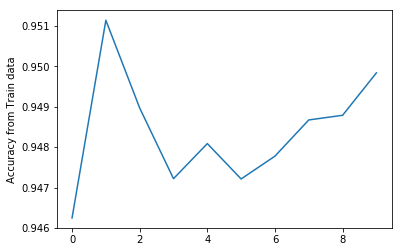

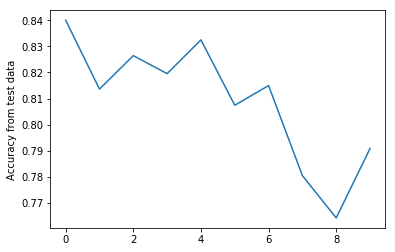

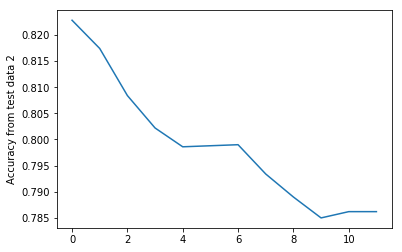

In [15]:
plt.plot(acc_train)
plt.ylabel('Accuracy from Train data')
plt.show()

plt.plot(acc_test)
plt.ylabel('Accuracy from test data')
plt.show()

plt.plot(acc_test2)
plt.ylabel('Accuracy from test data 2')
plt.show()

In [13]:
len(X_train)

10000